# Notebook 02 – Dataset Cleaning Overview
In this notebook, we explore the Alzheimer's dataset, check for missing values and inconsistencies, and prepare a cleaned version for further analysis and modeling.

### Step 1: Import libraries and load the dataset
Before working with the data, we first import the necessary Python libraries:
- `pandas` is used for handling tabular data  
- `numpy` helps with numerical operations  
- `matplotlib.pyplot` and `seaborn` are used for visualizing data
We then use `read_csv()` to load the dataset into a DataFrame called `df`, and `head()` to preview the first 5 rows.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [ ]:
# We load the dataset
df = pd.read_csv("../data/alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Output:Understanding the Columns
Before we clean or analyze data, we must understand what the values mean. 
In Business Intelligence, this step is part of "data exploration".
We need to know the "data types"and #what each number stands for".
This is important to avoid wrong assumptions.
And as we have learned in our previuos lesson:
 **GIGO principle: Garbage In, Garbage Out**. Meaning: If we input bad or unclear data, we will get bad results, even with smart models.

## Understanding the Columns
Column: PatientID → Type: ID → Unique number for each patient (not used for prediction). 
Column: Age → Type: Numeric → Age in years  
Column: Gender → Type: Categorical → 0 = Female, 1 = Male  
Column: Ethnicity → Type: Categorical → Example: 0 = White, 1 = Black, etc.  
Column: EducationLevel → Type: Ordinal → Higher number = more education  
Column: BMI → Type: Numeric → Body Mass Index (weight/height²)  
Column: Smoking → Type: Binary → 0 = No, 1 = Yes  
Column: AlcoholConsumption → Type: Numeric → How much alcohol is consumed  
Column: PhysicalActivity → Type: Numeric → Level of exercise  
Column: DietQuality → Type: Numeric → Higher = better diet  
Column: ADL → Type: Numeric → Help needed with daily tasks  
Column: Diagnosis → Type: Target (label) → 0 = No Alzheimer’s, 1 = Alzheimer’s  
Other columns like Confusion, MemoryComplaints, PersonalityChanges are Binary symptoms:  
0 = No, 1 = Yes

### Why this matters:  
If we don’t understand the meaning and type of each column, we can’t clean or analyze the data correctly.  
This is part of Data Exploration in BI and helps prevent GIGO 


### Step 2: Data Structure Overview
In this step, we use the `.info()` function to get a general overview of our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### Output: What did we found?

### What we found:
- The dataset has 2149 rows and 35 columns.
- All columns have non-null values, so there are no missing values.
- We have 3 types of data:
  - int64 → whole numbers (Age, Gender, Diagnosis)
  - float64 → decimals (BMI, AlcoholConsumption)
  - object → text (only DoctorInCharge, which is not used for training)

### So why is this important?
It is important because:
- We can skip missing value handling in this case.
- We see which columns need encoding (as Gender, Ethnicity) or scaling ( BMI, CholesterolTotal) later.
- We prepare for feature engineering and model training.

### Connection to BI Theory:
- This is part of the ETL process:  
  → We Extract the data,  
  → Then we **Explore and Transform** it (check types, structure),  
  → Finally we **Load** it into a machine learning model or dashboard.


### Step 3: Missing Values check in every colum
Here we identify any columns with missing values in the dataset.

In [11]:
missing = df.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

'No missing values found.'

### Output: 
As we can see there is no missing values to be found

### Step 4: Summary Statistics for Numerical Features
Descriptive statistics for all numerical columns.

In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Output: What we see from df.describe()
For each column, we see:
-  count shows the number of values (here it's 2149 for all, so no missing values) 
- mean is the average value
- std is the standard deviation, which shows how spread out the data is  
min and max show the smallest and largest values.
- 25%, 50%, and 75% are the quartiles, which help us find skewness and outliers.

What we can conclude:
1. Most people in the dataset are elderly, between 60 and 90 years old, with an average age of 75. 
2. BMI values are generally high, with an average around 28 and possible outliers above 35.
3. There are no missing values, so we don’t need to handle nulls. 
4. The values look reasonable and help us decide which features may need cleaning or scaling.
We now know which columns may need outlier handling or transformations


### Step 5:Boxplots to Detect Outliers for all numeric features

<Figure size 1600x6000 with 0 Axes>

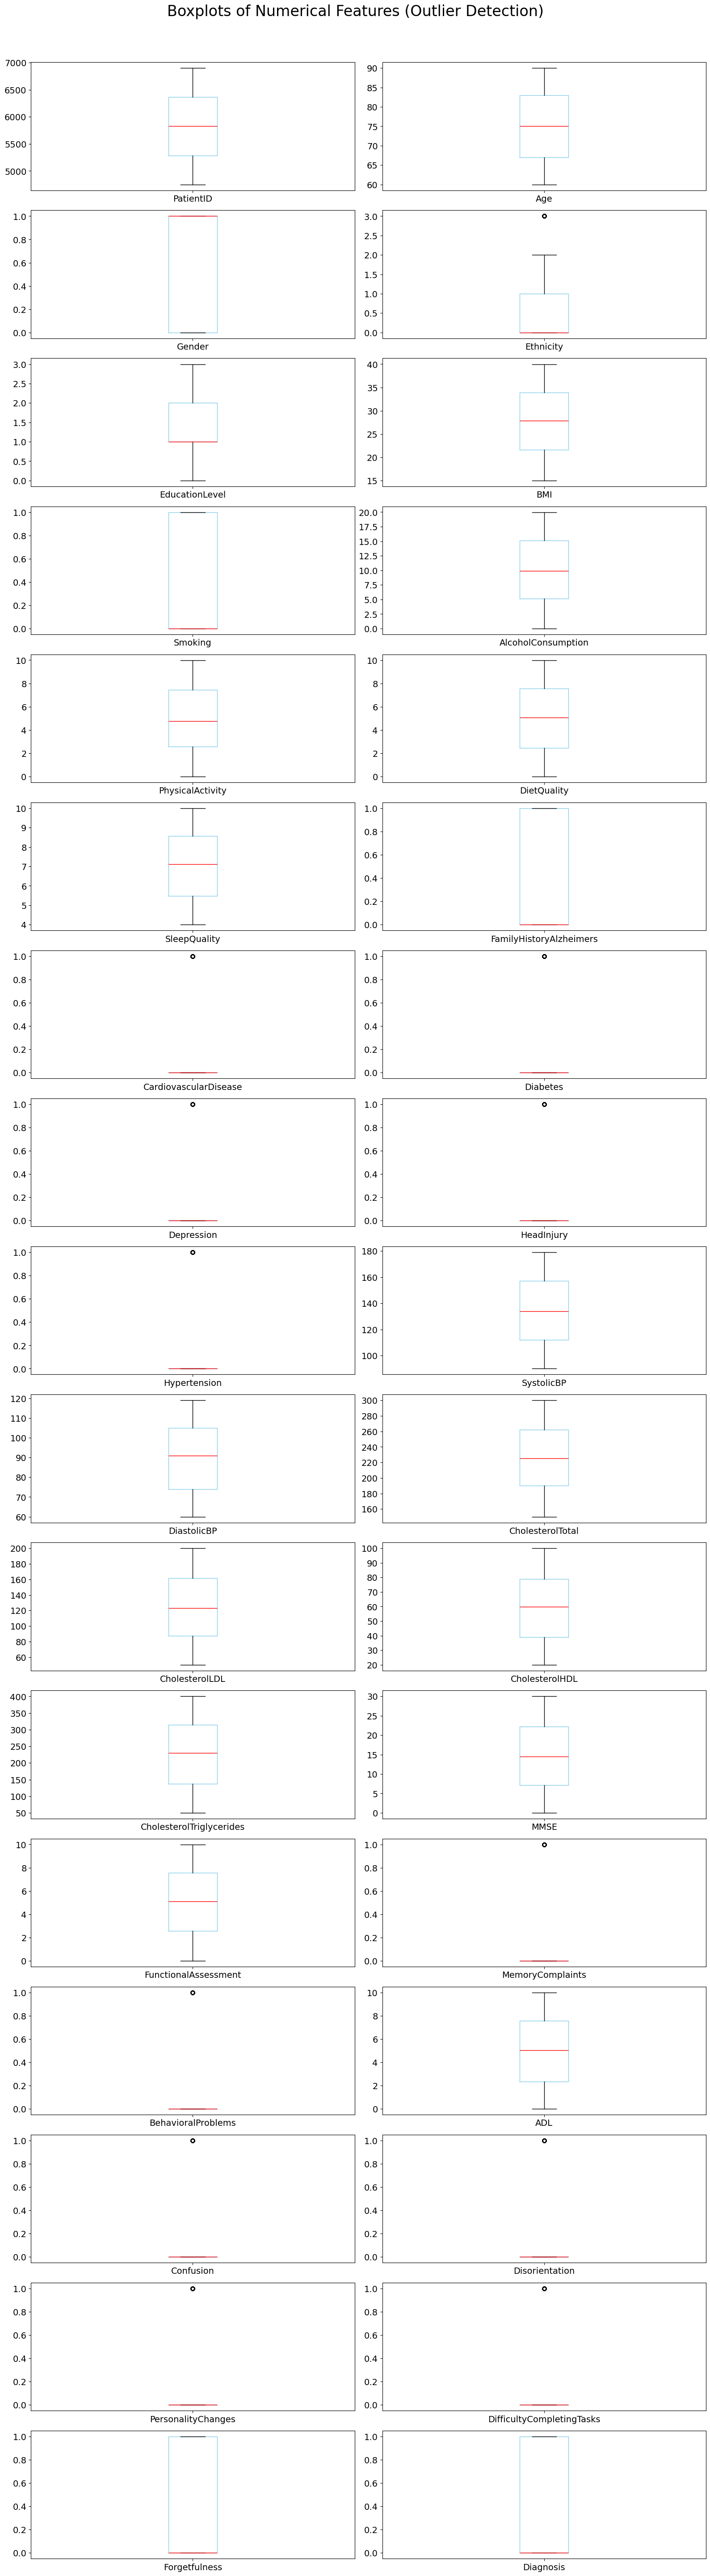

In [60]:
#boxplots
df.select_dtypes(include=['int64', 'float64']).plot(
    kind='box',
    subplots=True,
    layout=(18, 2),             
    figsize=(16, 60),          
    sharex=False,
    sharey=False,
    fontsize=14,               
    color=dict(
        boxes='skyblue',
        whiskers='black',
        medians='red',
        caps='black'
    )
)

plt.suptitle('Boxplots of Numerical Features (Outlier Detection)', fontsize=24, y=1.01)
plt.tight_layout()
plt.show()


### Output: 
A boxplot shows how data is spread for each numerical feature  
Here is what each part of the plot means:
-> The red line in the center is the "median" (middle value). 
-> The blue box shows the range of most data (typically from the 25th to 75th percentile). 
->The small black dots outside the box are "outliers"  = extreme.
These are values that are either lower or higher than the rest and are considered extreme.

### What do we see in our boxplots
1. BMI:
Most people have a BMI between 20 and 35, which is normal.
But a few people have a BMI around 40, which are outliers. 
This is important because high BMI is linked to Alzheimer risk. 
2. AlcoholConsumption:
Most values are between 0 and 12, but a few go above 18 or 20  
These outliers drink much more than the rest of the group
3. SleepQuality: 
Looks mostly normal!
One person has very low sleep quality (below 5), which stands out.
This could be an important indicator, not necessarily wrong. 
4. SystolicBP and DiastolicBP (Blood Pressure)  
Some people have very high blood pressure. These are not mistakes but may affect the model if left untreated.
5. CholesterolTotal, CholesterolLDL, CholesterolTriglycerides. 
We see very high values in a few people, which are clear outliers. 
High cholesterol is a key health factor and might need transformation-
- Binary features like Confusion, Forgetfulness, PersonalityChanges, 
these are binary variables (0 or 1) it appear because most people are 0 and only a few are 1. 
This is normal and not an error, just imbalanced data.

### What can we do with outliers:
We can remove them if they cause problems for machine learning. 
We can keep them if they represent important health cases. 
We can transform them ( using log scale) to reduce their impact

### Step 6:Distribution pots of nmerical fatures

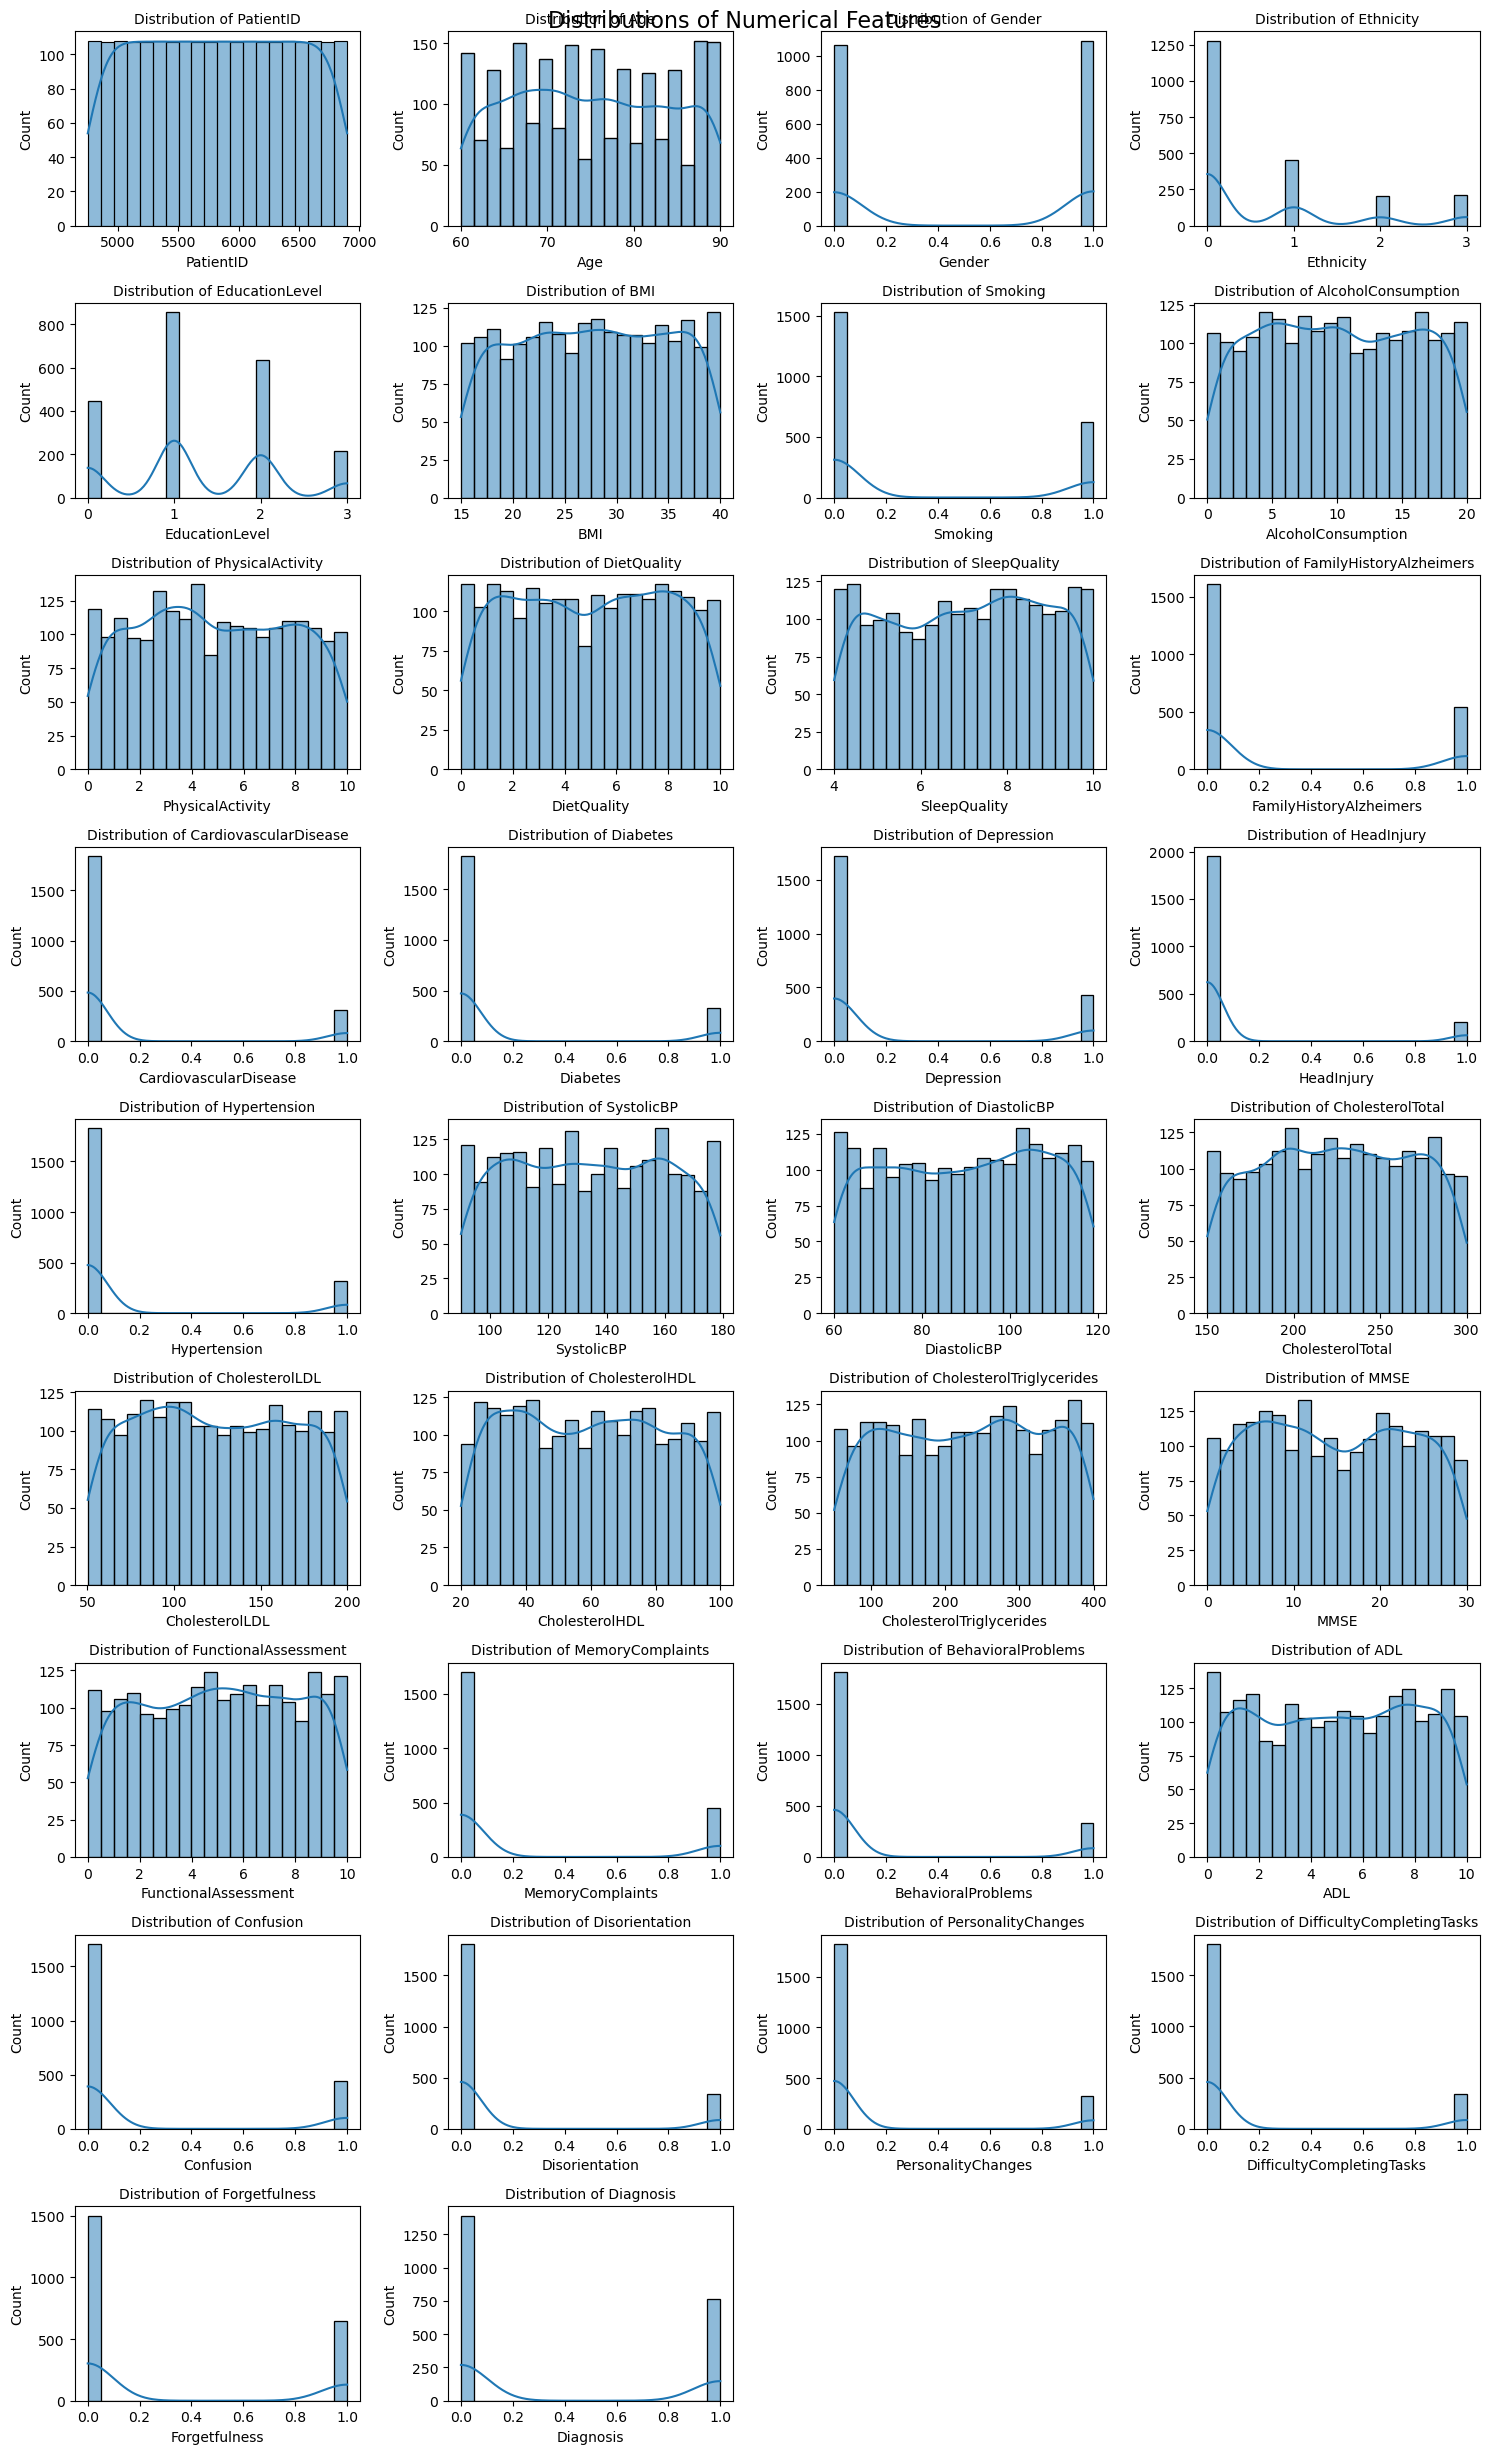

In [62]:
# histograms for numerical columns
plt.figure(figsize=(15, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.tight_layout()

plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### Output: 
These plots show the distribution of each numeric column. Each bar shows how many people fall into each value range. It is a part of Exploratory Data Analysis (EDA) and helps us prepare our data for modeling

### Here is what we observed:
**Age**
The distribution is close to uniform but with more people between 70 and 85. This fits our project since Alzheimer mostly affects older people. 

**BMI**
BMI values are spread between 15 and 40, we see that it is slightly right-skewed, meaning more people have lower BMI, and a few have very high BMI.This is important because extreme BMI may affect health predictions. 

**AlcoholConsumption**
Most people drink less than 10 units,a few people drink between 15 and 20.
The shape is right-skewed, with many low values and a few high ones.
These extreme cases could be outliers.

**SleepQuality**
The data looks normally distributed, mostly between 5 and 10, and it has a good shape for modeling.

**PhysicalActivity**
Spread quite evenly from 0 to 10, it shows us that activity levels are diffent across people. 

**SystolicBP and DiastolicBP (Blood Pressure)**
These look fairly normal, we see a healthy range between 100 and 180 systolic, and 60 to 120 diastolic. 
No big skew or gaps.

**CholesterolTotal, LDL, HDL, Triglycerides**
These look slightly right-skewed, especially Triglycerides. 
Means some people have very high cholesterol, which could be important outliers. 

**MMSE**
This is a test score related to memory, meaning values go from 0 to around 30.The distribution shows fewer people with low scores, more in the middle and high, which is expected in early Alzheimer detection  

**Diagnosis**
Most people have a value of 0, which means no Alzheimer diagnosis. 
Only a small group has value 1. This is an imbalanced feature — important for classification. The model may need balancing techniques (oversampling)  

**Confusion, Forgetfulness, PersonalityChanges**
These binary features show the same pattern. Mostly 0s, very few 1s. 
This is normal in health data, but it means the features are imbalanced. 
------------------------------------------------------------------------
These distribution plots give us a full overview. 
We learn which features are normal, skewed, imbalanced, or possibly have outliers. This helps us prepare our data better for machine learning  
It supports good feature engineering, transformation, and cleaning  
It is part of the GIGO principle "good input leads to good predictions"


### Step 7: Outlier Removal using IQR
What is IQR?
IQR stands for Interquartile Range.It helps us detect outliers, values that are too far from the majority of the data.
In our case, we calculated:
Q1 = 25% percentile (lower quartile)
Q3 = 75% percentile (upper quartile)
IQR = Q3 - Q1
Outliers are values below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR

In [ ]:
# We will clean it and make a copy, so we make sure we do not change the original.
df_clean = df.copy()

# List of numerical features
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Loop over each numeric column and remove outliers using IQR
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Show new shape after outlier removal
print("Shape after removing outliers:", df_clean.shape)


Shape after removing outliers: (198, 35)


### Output:Outlier removal using IQR method:
"shape after removing outliers: (198, 35):
This means you now have 198 clean rows and 35 features left after outlier removal.
-we remove extreme values using the IQR method. 
Steps:
Q1 = 25th percentile  
Q3 = 75th percentile  
IQR = Q3 - Q1  
Any value lower than Q1, 1.5×IQR or higher than Q3 + 1.5×IQR is considered an outlier.
- We loop through each numeric column and filter the rows that are within the normal range. This step helps reduce noise in the data.

### Step 8:Scaling Numerical Features
We use StandardScaler to normalize all numeric features, its a good method because it centers the data so the mean is 0, and the standard deviation is 1. Without scaling, features aske Cholesterol and BloodPressure could dominate smaller values like BMI or SleepQuality.
And we only applu acaling after removing outliers and encoding categorical features.  
This completes our data preparation step and gives us a clean, scaled dataset for modeling



In [25]:
# Make a copy of your cleaned dataframe
df_scaled = df_clean.copy()

In [26]:
# Select only numeric columns
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns

In [27]:
# Initialize the scaler
scaler = StandardScaler()

In [28]:
# Fit and transform the numeric data
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

In [29]:
# Show the first few rows to check
df_scaled.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1,-1.784799,1.540549,-1.051847,-0.628246,-1.358693,-0.094749,-0.65938,-0.925511,0.908737,-1.499070,...,0.0,0.0,-0.740439,0.0,0.0,0.0,0.0,1.481063,-0.596795,XXXConfid
33,-1.731900,-0.849277,-1.051847,-0.628246,-0.247035,-1.577037,-0.65938,1.384218,1.007507,0.985627,...,0.0,0.0,1.399542,0.0,0.0,0.0,0.0,-0.675191,-0.596795,XXXConfid
40,-1.720328,0.454265,0.950708,0.888739,-0.247035,0.859283,-0.65938,-0.005665,-0.476094,1.180737,...,0.0,0.0,0.850160,0.0,0.0,0.0,0.0,1.481063,-0.596795,XXXConfid
43,-1.715369,-0.957906,-1.051847,-0.628246,-0.247035,1.410979,-0.65938,-1.327002,-0.717443,1.665407,...,0.0,0.0,-0.650224,0.0,0.0,0.0,0.0,-0.675191,1.675617,XXXConfid
44,-1.713716,0.780150,-1.051847,-0.628246,-0.247035,-1.118408,-0.65938,0.603501,-0.141445,0.639768,...,0.0,0.0,0.182175,0.0,0.0,0.0,0.0,1.481063,-0.596795,XXXConfid


### Output: 
Now all numeric values are standardized, meaning:
- Each column has a mean around 0
- Values are mostly between -2 and +2
- This helps machine learning models treat all features equally
Negative values mean the original value was lower than the column average. 
Positive values mean it was higher than the average. 
This scaling step is important for algorithms that are sensitive to feature size.

 ### Step 8.1: How do we know if the scaler worked?

In [30]:
df_scaled.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02,...,198.000000,198.0,198.0,1.980000e+02,198.0,198.0,198.0,198.0,1.980000e+02,1.980000e+02
mean,-2.870880e-16,5.719331e-16,-1.076580e-16,4.934325e-17,-8.074349e-17,-3.936245e-16,1.794300e-17,-1.256010e-16,4.485750e-18,-1.973730e-16,...,0.000000,0.0,0.0,-1.525155e-16,0.0,0.0,0.0,0.0,-3.588600e-17,-2.691450e-17
std,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,1.002535e+00,...,1.002535,0.0,0.0,1.002535e+00,0.0,0.0,0.0,0.0,1.002535e+00,1.002535e+00
min,-1.784799e+00,-1.609676e+00,-1.051847e+00,-6.282464e-01,-1.358693e+00,-1.725225e+00,-6.593805e-01,-1.696587e+00,-1.718396e+00,-1.668482e+00,...,-1.694640,0.0,0.0,-1.591797e+00,0.0,0.0,0.0,0.0,-6.751906e-01,-5.967951e-01
25%,-7.383904e-01,-8.492772e-01,-1.051847e+00,-6.282464e-01,-2.470351e-01,-8.106392e-01,-6.593805e-01,-9.059933e-01,-8.454600e-01,-9.038870e-01,...,-0.981726,0.0,0.0,-8.103989e-01,0.0,0.0,0.0,0.0,-6.751906e-01,-5.967951e-01
50%,-6.144835e-02,-8.887784e-02,9.507082e-01,-6.282464e-01,-2.470351e-01,2.115645e-03,-6.593805e-01,-1.449320e-02,5.216133e-03,3.335415e-02,...,0.088256,0.0,0.0,-6.320888e-02,0.0,0.0,0.0,0.0,-6.751906e-01,-5.967951e-01
75%,8.481667e-01,8.887784e-01,9.507082e-01,8.887389e-01,8.646229e-01,8.372894e-01,1.516575e+00,8.428797e-01,8.496987e-01,8.668768e-01,...,0.843259,0.0,0.0,8.802739e-01,0.0,0.0,0.0,0.0,1.481063e+00,1.675617e+00
max,1.761088e+00,1.649178e+00,9.507082e-01,2.405724e+00,1.976281e+00,1.725344e+00,1.516575e+00,1.743116e+00,1.722711e+00,1.718581e+00,...,1.655394,0.0,0.0,1.761797e+00,0.0,0.0,0.0,0.0,1.481063e+00,1.675617e+00


 ### Output: df_scaled.describe()
We see that:
- The "mean" of each column is approximately 0 (5.7e-16, which is almost zero).
- The "std" (standard deviation) of each column is approximately 1 ( 1.002)
- The values now range from roughly -1.7 to +1.7
- All numeric features are now on the same scale
This is exactly what StandardScaler is supposed to do,it prepares the data for machine learning models that are sensitive to feature scale.

### Step 9: Correlation of All Features with Diagnosis
We select only numeric columns before calculating the correlation matrix  
This avoids errors caused by non-numeric columns like text labels  
Now we can see how strongly each feature is correlated with the target"Diagnosis"


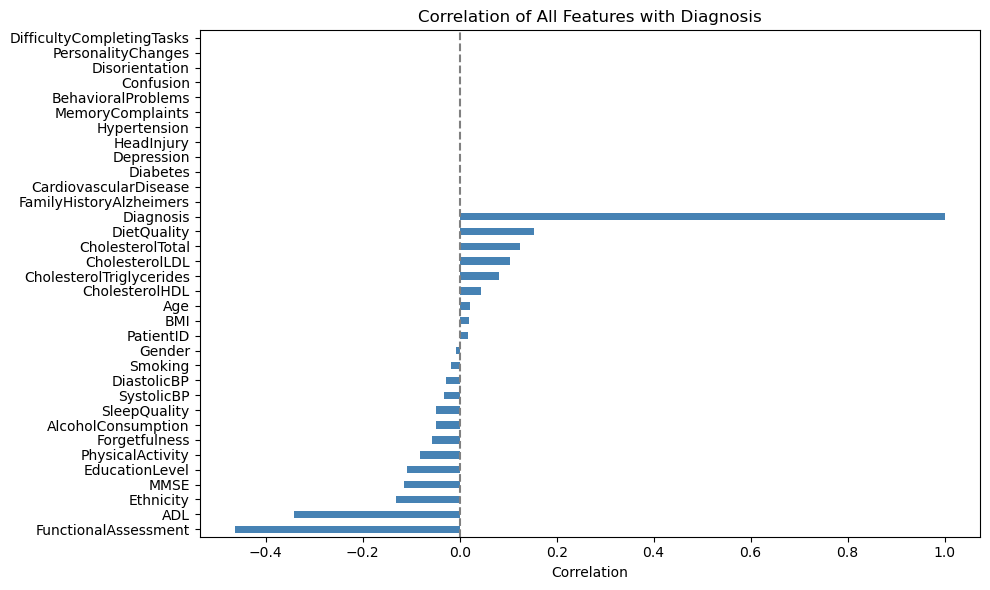

In [ ]:
# Calculate full correlation matrix
df_numeric = df_scaled.select_dtypes(include=["int64", "float64"])
cor_matrix = df_numeric.corr()

# Show all correlations with Diagnosis
correlation_with_target = cor_matrix["Diagnosis"].sort_values()

# Plot everything for review
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind="barh", color="steelblue")
plt.axvline(x=0, color="grey", linestyle="--")
plt.title("Correlation of All Features with Diagnosis")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()


### Output:
shows how each numeric feature is correlated with the target variable "Diagnosis".A high positive value means the feature increases with the probability of Alzheimer’s.A strong negative value means the feature decreases when Diagnosis = 1
The feature "FamilyHistoryAlzheimers" shows the strongest positive correlation. 
Other features like "DietQuality" and "CholesterolTotal" also show relevant positive influence. 


## Step 10  Grouped Feature Correlation Analysis
We calculate the correlation between all numerical features and the target "Diagnosis". We then group the features into categories such as Lifestyle, Health, Cognitive, and Demographic. 
This helps us understand which types of features are most strongly related to Alzheimer’s diagnosis.
It also supports better feature selection and modeling in the next sprint.


In [ ]:
# Check if target column exists
"Diagnosis" in df_scaled.columns


True

In [ ]:
# Ensure plots render inside notebook
%matplotlib inline

In [ ]:
# Selectsonly numeric columns for correlation.
# This avoids errors from non-numeric data like 'DoctorInCharge'
df_numeric = df_scaled.select_dtypes(include=["int64", "float64"])
corr_matrix = df_numeric.corr()

# Define features to group and evaluate
features = [
    "DietQuality", "CholesterolTotal", "CholesterolLDL", "BMI", "PhysicalActivity",
    "Forgetfulness", "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
    "Age", "Gender", "EducationLevel"
]

categories = [
    "Lifestyle", "Health", "Health", "Health", "Lifestyle",
    "Cognitive", "Cognitive", "Cognitive", "Cognitive", "Cognitive",
    "Demographic", "Demographic", "Demographic"
]

correlations = [corr_matrix["Diagnosis"][f] for f in features]

df_grouped = pd.DataFrame({
    "Feature": features,
    "Category": categories,
    "Correlation with Diagnosis": correlations
})

df_grouped_sorted = df_grouped.sort_values("Correlation with Diagnosis", ascending=False)


In [ ]:
# Showing the sorted categores
df_grouped_sorted


,Feature,Category,Correlation with Diagnosis
0,DietQuality,Lifestyle,0.153759
1,CholesterolTotal,Health,0.124169
2,CholesterolLDL,Health,0.104024
10,Age,Demographic,0.020514
3,BMI,Health,0.019346
11,Gender,Demographic,-0.007197
5,Forgetfulness,Cognitive,-0.056493
4,PhysicalActivity,Lifestyle,-0.081224
12,EducationLevel,Demographic,-0.109154
6,Confusion,Cognitive,NaN


In [ ]:
# Removing features with NaN correlation ( no variance)
df_grouped_sorted_clean = df_grouped_sorted.dropna()


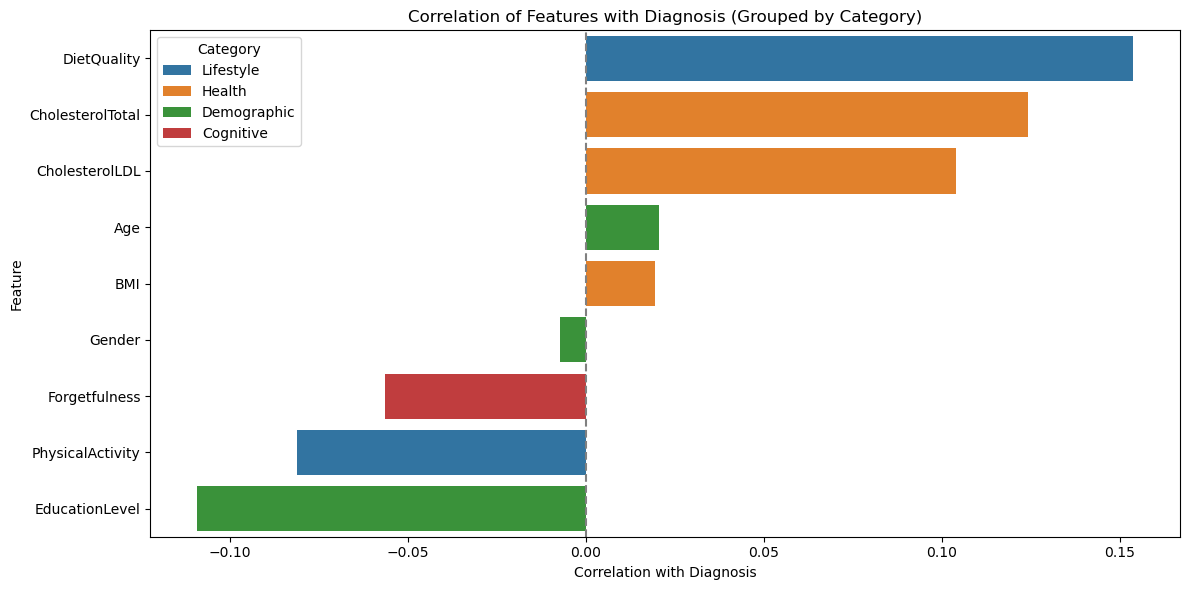

In [ ]:
#lot correlation grouped by category
plt.figure(figsize=(12, 6))

#Create barplot showing correlation values by feature
sns.barplot(
    data=df_grouped_sorted_clean,
    x="Correlation with Diagnosis",
    y="Feature",
    hue="Category",
    dodge=False
)

plt.axvline(x=0, color="grey", linestyle="--")
plt.title("Correlation of Features with Diagnosis (Grouped by Category)")
plt.tight_layout()
plt.show()


### Output:
This plot shows how each feature is correlated with the diagnosis outcome. Features are grouped by type: Lifestyle, Health, Demographic, and Cognitive.
We see that:
- "DietQuality" has the strongest positive correlation (poor diet = higher Alzheimer risk).
- "CholesterolTotal" and "LDL" also show strong positive correlation
- "EducationLevel", "PhysicalActivity", and "Forgetfulness" show negative correlation.
This confirms that both lifestyle and health factors are linked to Alzheimer’s. 


### Step 11 – Filtered Correlation Heatmap (|corr| ≥ 0.2)
This heatmap shows only the strongest correlations between numeric features.We filtered out values below ±0.2 to focus on meaningful relationships.Key observations:
- Cholesterol-related features are strongly correlated with each other (Total, LDL, Triglycerides)
- EducationLevel has moderate correlation with BMI and Ethnicity
- No features have a strong direct correlation with Diagnosis above 0.2
  → This confirms that Alzheimer's diagnosis depends on **many weak signals**, not a single dominant factor.

This heatmap helps us avoid multicollinearity and supports feature selection in Sprint 3


<Figure size 1800x1200 with 0 Axes>

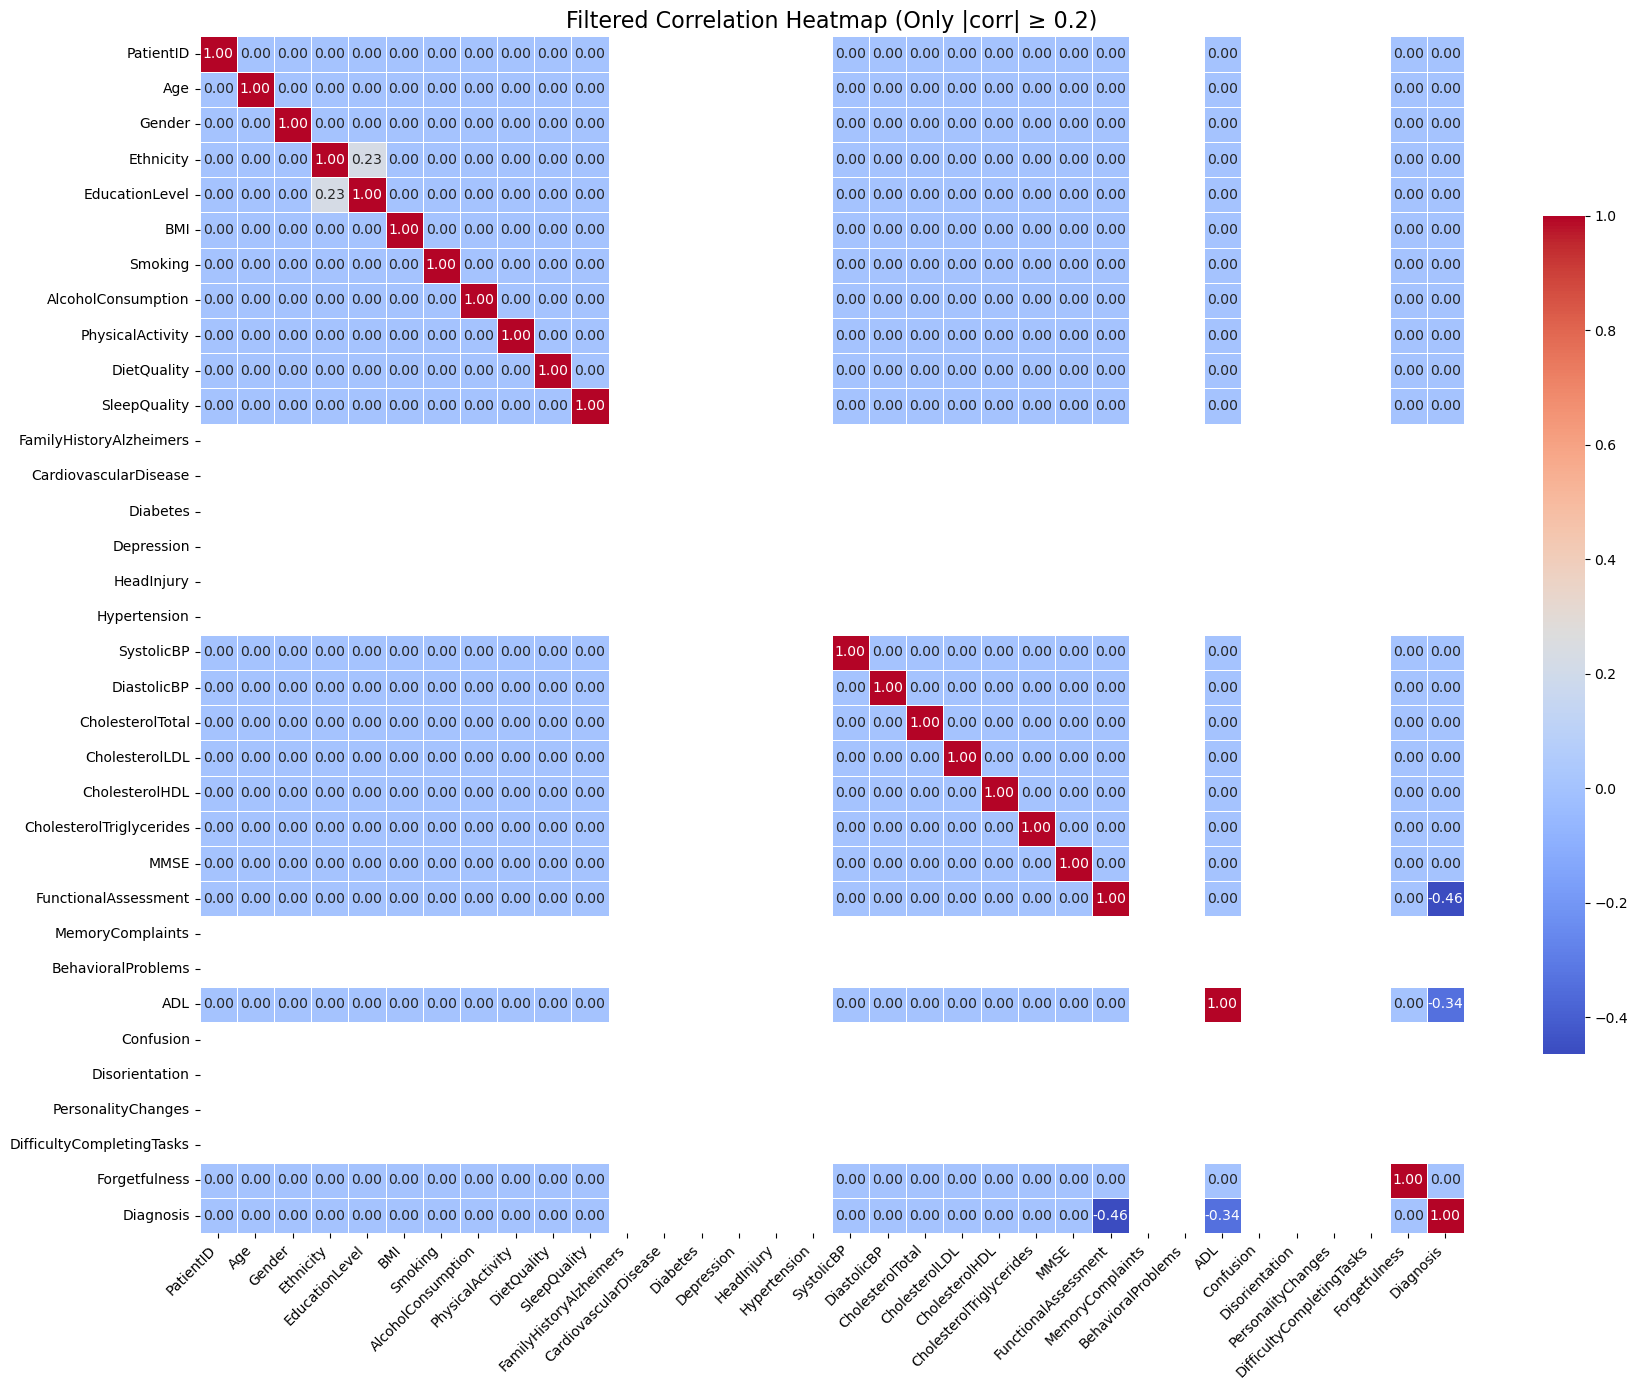

In [66]:
# focus only on meaningful ones
filtered_corr = corr_matrix.copy()
mask = (filtered_corr.abs() < 0.2) & (filtered_corr != 1.0)
filtered_corr[mask] = 0

plt.figure(figsize=(18, 14))
sns.heatmap(
    filtered_corr, annot=True, fmt=".2f", cmap="coolwarm",
    linewidths=0.5, square=False, cbar_kws={"shrink": 0.7}
)
plt.title("Filtered Correlation Heatmap (Only |corr| ≥ 0.2)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Step 12: Countplot: Family History vs Diagnosis


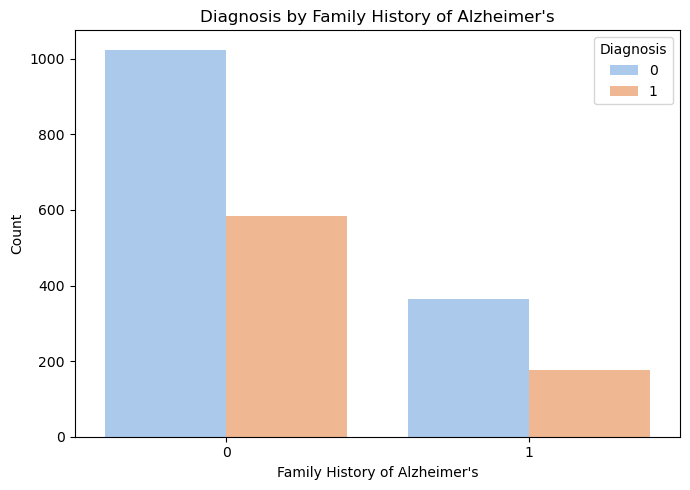

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df, palette='pastel')
plt.title('Diagnosis by Family History of Alzheimer\'s')
plt.xlabel('Family History of Alzheimer\'s')
plt.ylabel('Count')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

### Step 12: Lineplot: MMSE vs Age, split by Diagnosis

C:\Users\User\AppData\Local\Temp\ipykernel_13100\898187790.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='Age', y='MMSE', hue='Diagnosis', ci='sd', palette='tab10')


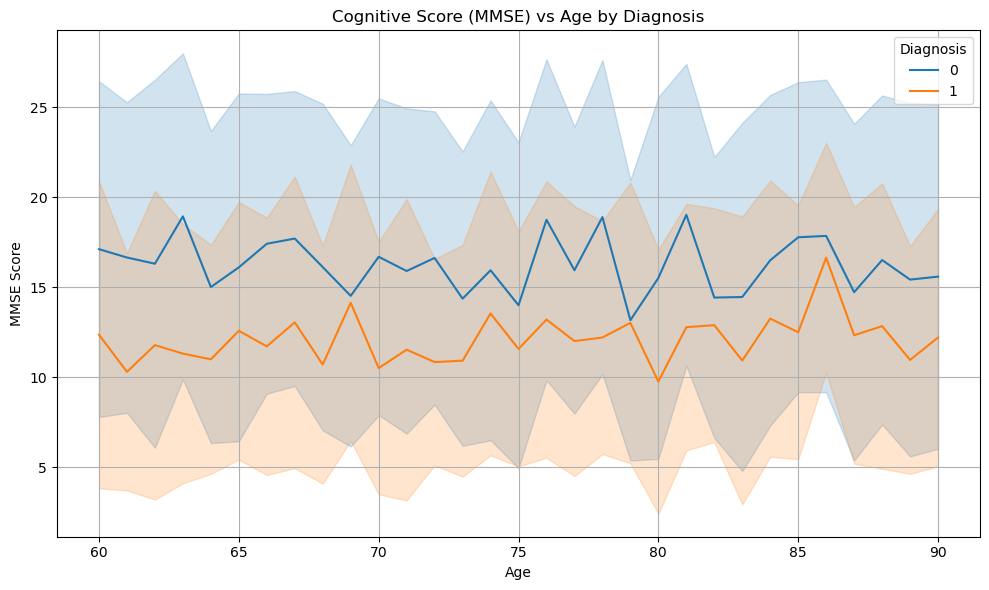

In [ ]:
#  Does cognitive score drop with age?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Age', y='MMSE', hue='Diagnosis', ci='sd', palette='tab10')
plt.title("Cognitive Score (MMSE) vs Age by Diagnosis")
plt.xlabel("Age")
plt.ylabel("MMSE Score")
plt.grid(True)
plt.tight_layout()
plt.show()


### Output: 
This lineplot shows the average MMSE score across age, split by Diagnosis.
MMSE (Mini-Mental State Examination) is a cognitive score higher = better cognition.What we see:
- People without Alzheimer’s (Diagnosis = 0) have higher MMSE scores at all ages.
- People with Alzheimer’s (Diagnosis = 1) have consistently lower scores.
- The gap is visible across the full age span (60–90).
Conclusion:
This confirms that cognitive decline (MMSE) is related to Alzheimer’s diagnosis  
It supports the use of MMSE and Age as predictive features in our model.


### Step 13:Visualise how features interact by diagnosis group


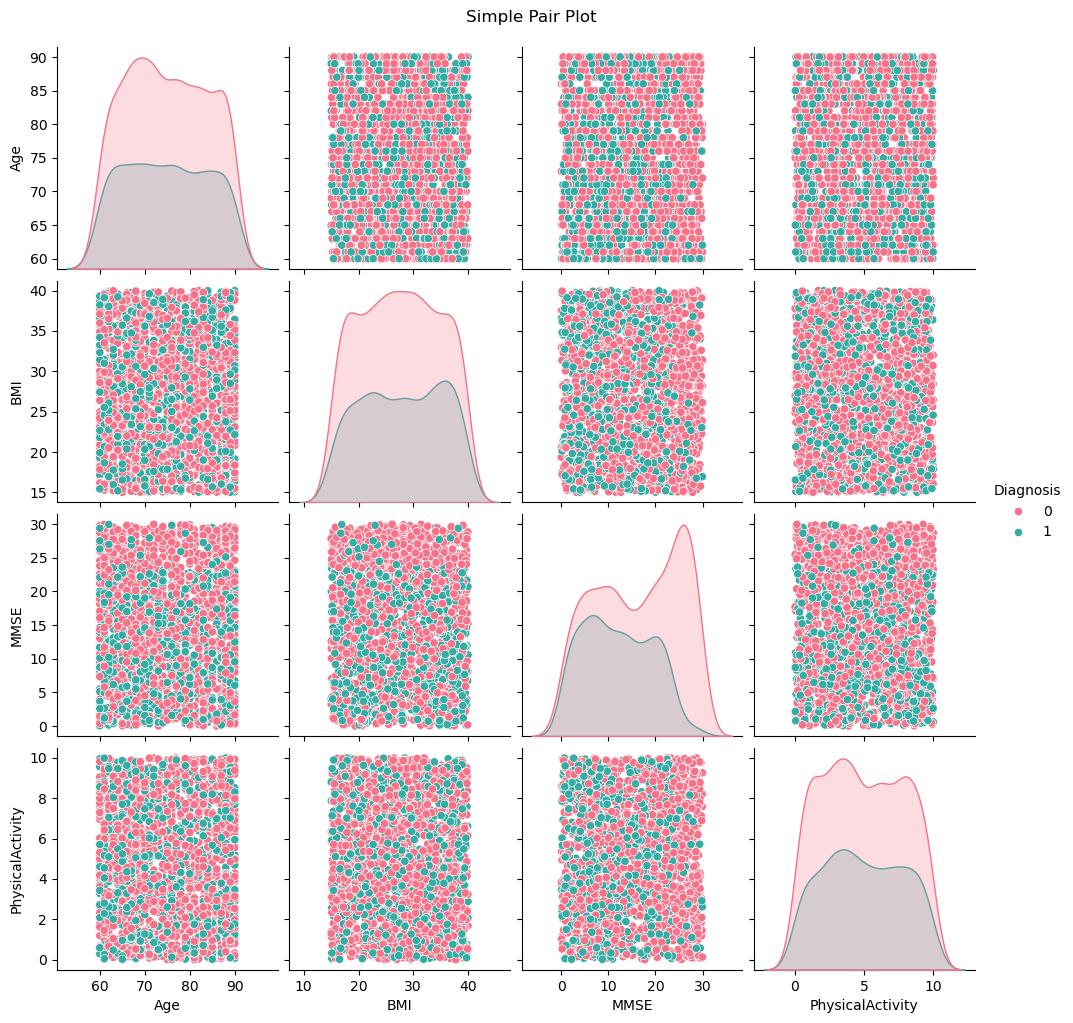

In [69]:
selected_features = df[['Age', 'BMI', 'MMSE', 'PhysicalActivity', 'Diagnosis']]
sns.pairplot(selected_features, hue='Diagnosis', palette='husl')
plt.suptitle('Simple Pair Plot', y=1.02)
plt.show()

This plot shows pairwise relationships between Age, BMI, MMSE, PhysicalActivity and Diagnosis.
How to read it:
- Diagonal plots show the **distribution** of each variable, split by Diagnosis
- Off-diagonal plots show **scatterplots** of feature combinations, with color-coded points:
  - Pink = Diagnosis 0 (no Alzheimer)
  - Green = Diagnosis 1 (Alzheimer)

Key observations:
- MMSE distribution differs clearly: patients with Diagnosis 1 have lower cognitive scores
- Age distribution is slightly different, with more Alzheimer's patients among older individuals
- PhysicalActivity shows minor separation less active individuals may be more likely to be diagnosed

Conclusion:
This plot confirms that MMSE and Age are visually separable features  
It supports using these variables in predictive modeling.